In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
#reading a dataset(.csv)
df = pd.read_csv("C:/Users/Balaji/Desktop/SEM 6/ML&C Lab/Datasets/housing.csv")

In [39]:
print(df.head(7))           #printing top(7) values of dataset

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4   

In [40]:
print(df.tail(4))                    #printing last 4 values

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  


In [41]:
df.describe()                #discription about attribute

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
df.count()               #counting total numbrer of values

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [43]:
df.isna().sum()              #number of null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [44]:
SI = SimpleImputer(strategy='mean', missing_values=np.nan)
df['total_bedrooms'] = SI.fit_transform(df[['total_bedrooms']])

In [45]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [93]:
x=df.iloc[:,0:8]
y=df.median_house_value

In [94]:
sc=StandardScaler()
x_std = sc.fit_transform(x)

In [95]:
x_train,y_train,x_test,y_test=train_test_split(x_std,y,test_size=0.3,random_state=42)

In [99]:
from sklearn.neural_network import MLPRegressor 
mlp = MLPRegressor(hidden_layer_sizes=(200), activation='relu',solver='lbfgs',max_iter=100)

In [100]:
mlp

MLPRegressor(hidden_layer_sizes=200, max_iter=100, solver='lbfgs')

In [101]:
mlp.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [14448, 6192]

In [25]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [26]:
df.sort_values('households')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
8985,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


In [27]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
df.iloc[1:6:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [29]:
df.iloc[1:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
y=np.sort(df.housing_median_age.unique())

In [31]:
y

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.])

In [32]:
db=pd.read_csv('C:/Users/Balaji/Desktop/SEM 6/ML&C Lab/diabetes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Balaji/Desktop/SEM 6/ML&C Lab/diabetes.csv'

In [33]:
db

NameError: name 'db' is not defined

In [28]:
np.sort(db.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81], dtype=int64)

In [29]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
db.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

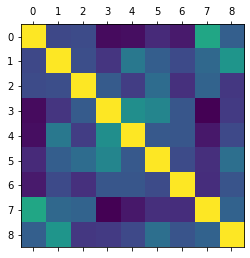

In [36]:
#matplot

plt.matshow(db.corr())

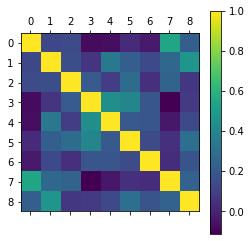

In [38]:

plt.matshow(db.corr())
plt.colorbar()

In [41]:
cols=db.columns

([<matplotlib.axis.XTick at 0x1c7de757c10>,
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

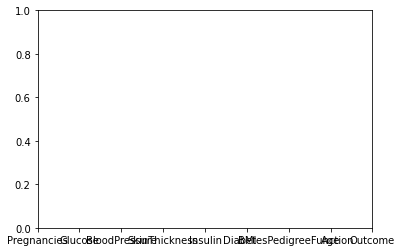

In [43]:
plt.xticks(list(range(len(cols))),cols)

([<matplotlib.axis.XTick at 0x1c7db45d190>,
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

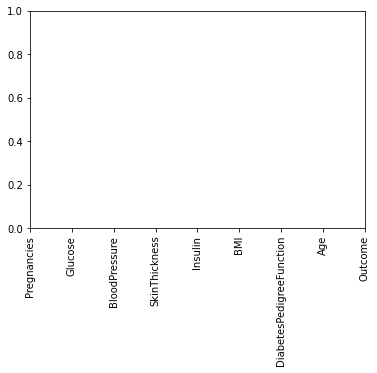

In [44]:
plt.xticks(list(range(len(cols))),cols,rotation='vertical')

([<matplotlib.axis.YTick at 0x1c7de95b580>,
 [Text(0, 0, 'Pregnancies'),
  Text(0, 1, 'Glucose'),
  Text(0, 2, 'BloodPressure'),
  Text(0, 3, 'SkinThickness'),
  Text(0, 4, 'Insulin'),
  Text(0, 5, 'BMI'),
  Text(0, 6, 'DiabetesPedigreeFunction'),
  Text(0, 7, 'Age'),
  Text(0, 8, 'Outcome')])

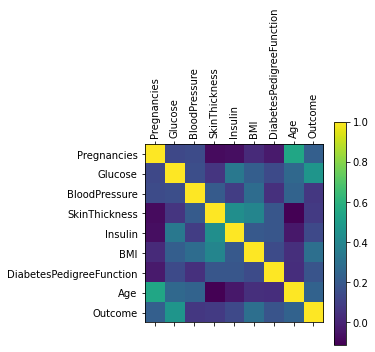

In [47]:
plt.matshow(db.corr())
plt.colorbar()
plt.xticks(list(range(len(cols))),cols,rotation='vertical')
plt.yticks(list(range(len(cols))),cols,rotation='horizontal')

([<matplotlib.axis.YTick at 0x1c7dea1ef10>,
 [Text(0, 0, 'Pregnancies'),
  Text(0, 1, 'Glucose'),
  Text(0, 2, 'BloodPressure'),
  Text(0, 3, 'SkinThickness'),
  Text(0, 4, 'Insulin'),
  Text(0, 5, 'BMI'),
  Text(0, 6, 'DiabetesPedigreeFunction'),
  Text(0, 7, 'Age'),
  Text(0, 8, 'Outcome')])

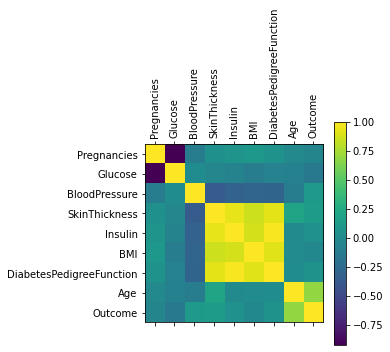

In [48]:
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(list(range(len(cols))),cols,rotation='vertical')
plt.yticks(list(range(len(cols))),cols,rotation='horizontal')

([<matplotlib.axis.YTick at 0x1c7deaeb520>,
 [Text(0, 0, 'longitude'),
  Text(0, 1, 'latitude'),
  Text(0, 2, 'housing_median_age'),
  Text(0, 3, 'total_rooms'),
  Text(0, 4, 'total_bedrooms'),
  Text(0, 5, 'population'),
  Text(0, 6, 'households'),
  Text(0, 7, 'median_income'),
  Text(0, 8, 'median_house_value'),
  Text(0, 9, 'ocean_proximity')])

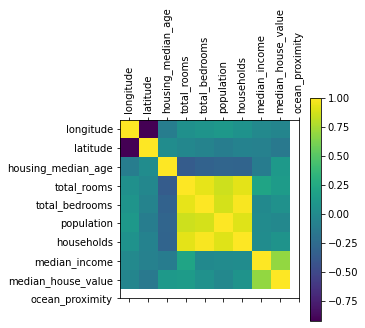

In [49]:
colms=df.columns
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(list(range(len(colms))),colms,rotation='vertical')
plt.yticks(list(range(len(colms))),colms,rotation='horizontal')

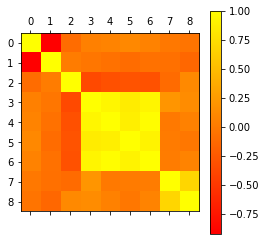

In [52]:
plt.matshow(df.corr(),cmap='autumn')
plt.colorbar()

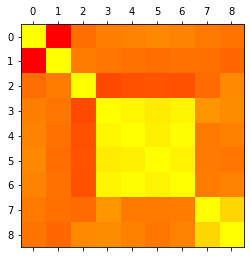

In [53]:
plt.matshow(df.corr(),cmap='autumn')

([<matplotlib.axis.YTick at 0x1c7df1755b0>,
 [Text(0, 0, 'longitude'),
  Text(0, 1, 'latitude'),
  Text(0, 2, 'housing_median_age'),
  Text(0, 3, 'total_rooms'),
  Text(0, 4, 'total_bedrooms'),
  Text(0, 5, 'population'),
  Text(0, 6, 'households'),
  Text(0, 7, 'median_income'),
  Text(0, 8, 'median_house_value'),
  Text(0, 9, 'ocean_proximity')])

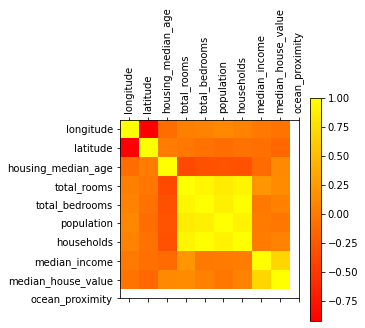

In [58]:
plt.matshow(df.corr(),cmap='autumn')
plt.colorbar()
plt.xticks(list(range(len(colms))),colms,rotation='vertical')
plt.yticks(list(range(len(colms))),colms,rotation='horizontal')

In [60]:
print(cols)

print(colms)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [63]:
#df
colms

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [64]:
#db
cols


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
db.Age

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [69]:
df.housing_median_age

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

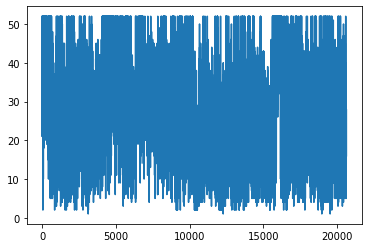

In [70]:
plt.plot(df.housing_median_age)

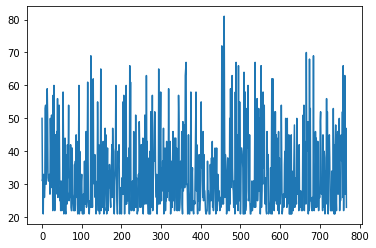

In [71]:
plt.plot(db.Age)

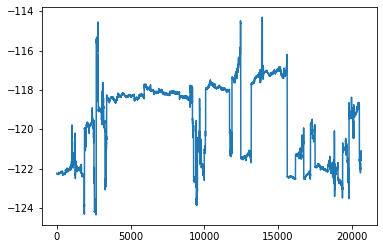

In [72]:
plt.plot(df.longitude)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7e19617f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7e1961e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7e1961520>],
 'medians': [<matplotlib.lines.Line2D at 0x1c7e19723a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c7e1972670>],
 'means': []}

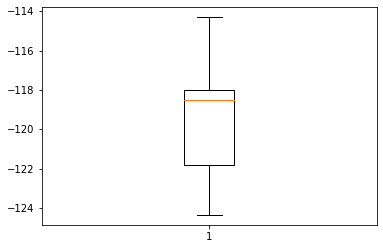

In [73]:
plt.boxplot(df.longitude)

(array([1.7525e+04, 2.5580e+03, 3.7200e+02, 1.0300e+02, 4.9000e+01,
        1.6000e+01, 7.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([2.00000e+00, 3.93380e+03, 7.86560e+03, 1.17974e+04, 1.57292e+04,
        1.96610e+04, 2.35928e+04, 2.75246e+04, 3.14564e+04, 3.53882e+04,
        3.93200e+04]),
 <BarContainer object of 10 artists>)

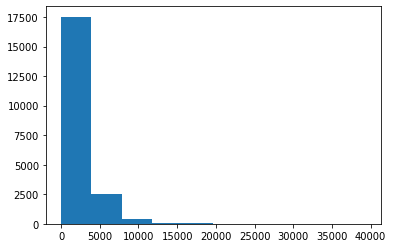

In [74]:
plt.hist(df.total_rooms)

<AxesSubplot:>

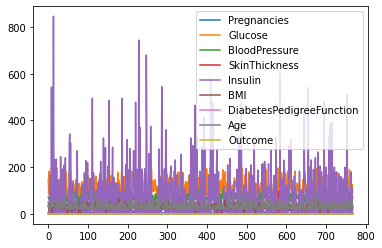

In [75]:
db.plot()

<AxesSubplot:>

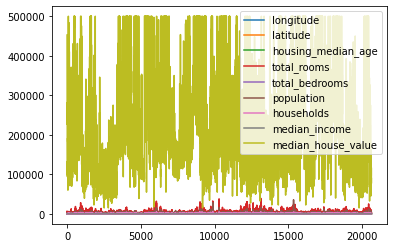

In [76]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

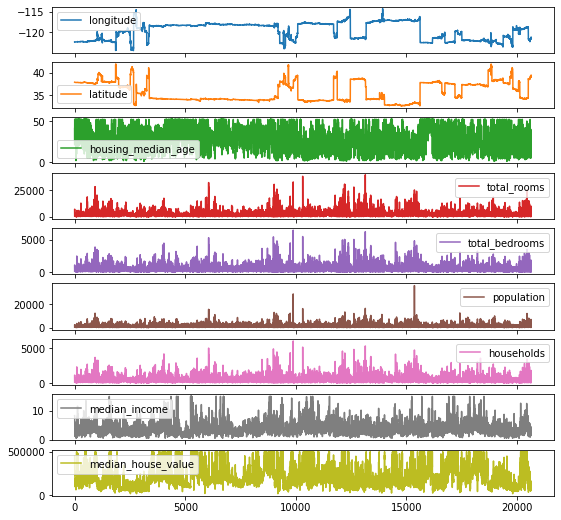

In [78]:
df.plot(subplots=True,figsize=(9,9))

In [81]:
dummy=pd.get_dummies(df.population)

In [82]:
dummy

,3.0,5.0,6.0,8.0,9.0,11.0,13.0,14.0,15.0,17.0,...,12203.0,12427.0,12873.0,13251.0,15037.0,15507.0,16122.0,16305.0,28566.0,35682.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
